# Ukeoppgaver – Flerstegsmetoder og systemer av ODE-er

## Oppgaver for hånd

### **Oppgave 1 – Et enkelt system med kjent løsning**

Vi ser på systemet:

$\begin{cases}
x'(t) = y(t) \\
y'(t) = -x(t)
\end{cases}$

1. Bruk derivasjon for å vise at $x''(t) = -x(t)$.  
2. Ved å tippe at $x(t)=A cos(\omega t)$, finn hva $\omega$ må være. Finn så $y(t)$.  
3. Finn $C$ med å bruke startbetingelsene $x(0)=1$, $y(0)=0$.  
4. Tegn kurven som $(x(t),y(t))$ lager i xy-planet og forklar hva slags bevegelse dette beskriver (sirkel, spiral, osv.).
5. Hvordan tror du faseportrettet ser ut?  
6. Hva tror du skjer dersom vi legger til friksjon slik at $y'(t) = -x(t) - 0.2y(t)$?  
   (Du trenger ikke løse – bare forklar fysisk.)

---

### **Oppgave 2 – Adams–Bashforth 2-stegs metode**

For en differensiallikning $y' = f(x,y)$ kan en to-stegs metode skrives som:

$y_{n+1} = y_n + \frac{h}{2}(3f_n - f_{n-1})$

1. Forklar i ord hvordan denne metoden bruker informasjon fra tidligere steg.  

For å starte Adams-Bashford trenger vi som oftest 2 eller flere startverdier.
Som oftest har vi bare 1 startverdi. 
Det løser man ofte med å for eksempel ta 1 steg med Eulers metode først. 
For differensiallikningen $y'=xy$ som har en generell løsning $y(x)=Ce^{x^2}$:

2. Finn den spesielle løsningen for $(x_0, y_0)= (0,1)$
3. Finn $y_1$ med å ta ett steg med Eulers metode, hvor $h=0.5$. 
4. Finn $y_2$ med å bruke Adams-Bashforth 2-stegs metode.
5. Finn $y_2$ med å bare bruke Eulers metode. 
6. Sammenlign svarene med den eksakte løsningen. 
---

### **Oppgave 3 – Linearisering av en enkel pendel**

En enkel pendel (med svak friksjon) kan modelleres som:

$\begin{cases}
\theta'(t) = \omega(t) \\
\omega'(t) = -\frac{g}{L}\sin(\theta) - c\omega(t)
\end{cases}$

Hvor $\theta$ er vinkelen i forhold til loddrett ned, og $\omega$ er vinkelhastigheten (hvor rask pendelen svinger).
Hvor $g=9.81$ er tyngeakselerasjonen, $L=1.0$ er lengden på pendelen, og $c=0.1$ er friksjonskoeffisienten.

1. Finn likevektene (der $\theta'(t)=0$ og $\omega'(t)=0$).  
2. Forklar at $\sin(\theta) \approx \theta$ for små vinkler.  
3. Sett dette inn i likningen og skriv opp det **lineariserte systemet**.  
4. Forklar kvalitativt hva som skjer dersom $c>0$. Hva betyr det fysisk?
5. Når kan vi bruke denne modellen? Klarer vi å hvordan antakelsene våre påvirker det ekte systemet?


## Digitale oppgaver

### **Oppgave 4 – Den dempede pendelen**

Vi ser på samme system som over:

$\begin{cases}
\theta'(t) = \omega(t) \\
\omega'(t) = -\frac{g}{L}\sin(\theta) - c\omega(t)
\end{cases}$

med $g=9.81$, $L=1.0$, og $c=0.1$. 

1. Implementer de deriverte i Python
2. Tegn faseportrettet i $(\theta, \omega)$-planet.
3. Løs numerisk med RK4 for $t \in [0,20]$ og startverdier $\theta(0)=0.8$, $\omega(0)=0$. (Her kan `scipy.solve_ivp` være til stor nytte)
4. Plott $\theta(t)$ og $\omega(t)$ over tid.  
5. Øk friksjonen til $c=1.0$ og kommenter forskjellen.  
6. Hva skjer hvis startverdiene istedet er $\theta_0 = 0$ og $\omega_0=5$, kommenter fysisk hva som skjer. 
7. Prøv å bruke et for stort tidssteg (for eksempel $h=0.5$) – hva skjer?


Text(0, 0.5, 'Vinkelhastighet (radianer per sekund)')

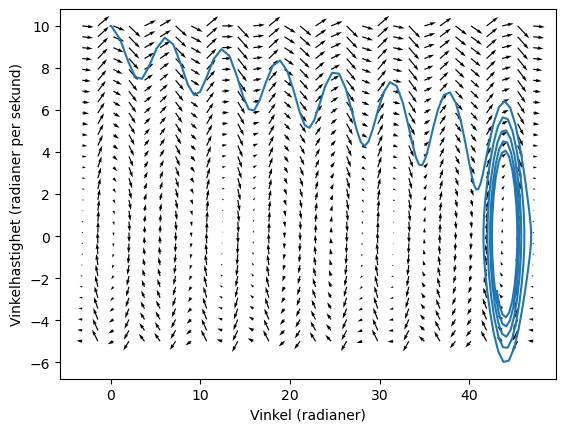

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

def dydt(t, y):
    # Regner ut de deriverte til systemet og returnerer de i en array
    #   int t: Simuleringstiden
    # array y: En array med de partiell deriverte
    #
    # Returnerer en liste med de deriverte til systemet
    return np.array([dTheta_dt(t, y[0], y[1]), dOmega_dt(t, y[0], y[1])])

def dTheta_dt(t, theta, omega):
    # Regner den deriverte til theta for en verdi for:
    #     t: tiden 
    # theta: vinkelen
    # omega: vinkelhastigheten
    return omega

def dOmega_dt(t, theta, omega):
    # Regner den deriverte til theta for en verdi for:
    #     t: tiden 
    # theta: vinkelen
    # omega: vinkelhastigheten
    return -g/L * np.sin(theta) - c*omega

# Fysiske parametre
g = 9.81
L = 1
c = 0.1

# Start/slutt tid
t0 = 0
tSlutt = 20
ts = np.linspace(0, 20, 200)

# Startverdier
o0 = 10
theta0 = 0


# Estimerer løsning, enten med scipy.solve_ivp eller med å kode RK4 selv
sol = scipy.integrate.solve_ivp(dydt, t_span=[t0, tSlutt], y0=[theta0, o0], max_step = 10**-1)
Ts = sol.t 
theta_sol = sol.y[0]
omega_sol = sol.y[1]


# Tegner faseportrett
theta0, theta1 = -1*np.pi, 15*np.pi
omega0, omega1 = -5, 10
n = 30

thetas = np.linspace(theta0, theta1, n)
omegas = np.linspace(omega0, omega1, n)
thetas2, omegas2 = np.meshgrid(thetas, omegas)

dx = dTheta_dt(0, thetas2, omegas2)
dy = dOmega_dt(0, thetas2, omegas2)

fig, ax = plt.subplots()

ax.plot(theta_sol, omega_sol)
ax.quiver(thetas, omegas, dx, dy)
ax.set_xlabel("Vinkel (radianer)")
ax.set_ylabel("Vinkelhastighet (radianer per sekund)")



### **Oppgave 5 – En realistisk bane med drag**

Vi studerer et objekt som beveger seg i bane rundt et fast sentrum.  
Kraften peker mot origo, men det finnes også et lite drag (luftmotstand).  
Systemet er gitt ved:

$\begin{cases}
x'(t) = v_x(t) \\
y'(t) = v_y(t) \\
v_x'(t) = -x(t) - c v_x(t) \\
v_y'(t) = -y(t) - c v_y(t)
\end{cases}$

med $c = 0.05$.

Startbetingelser:  
$x(0)=1$, $y(0)=0$, $v_x(0)=0$, $v_y(0)=0.9$

1. Implementer systemet i Python og løs det numerisk med RK4 for $t \in [0, 50]$.  
2. Plott baneportrettet $(x(t), y(t))$.  
3. Tegn også $v_x(t)$ og $v_y(t)$ som funksjon av tid i en annen figur. 
4. Hva skjer med banen når $c=0$ (ingen friksjon)?  
5. Hva skjer når du øker $c$ til $0.2$?  
6. Forklar fysisk hvorfor banen spiralerer inn mot origo.  
7. Bonus: Plott total energi  
   $E(t) = \frac{1}{2}(v_x^2 + v_y^2) + \frac{1}{2}(x^2 + y^2)$  
   og observer hvordan den endres over tid.


Text(0, 0.5, 'Energi')

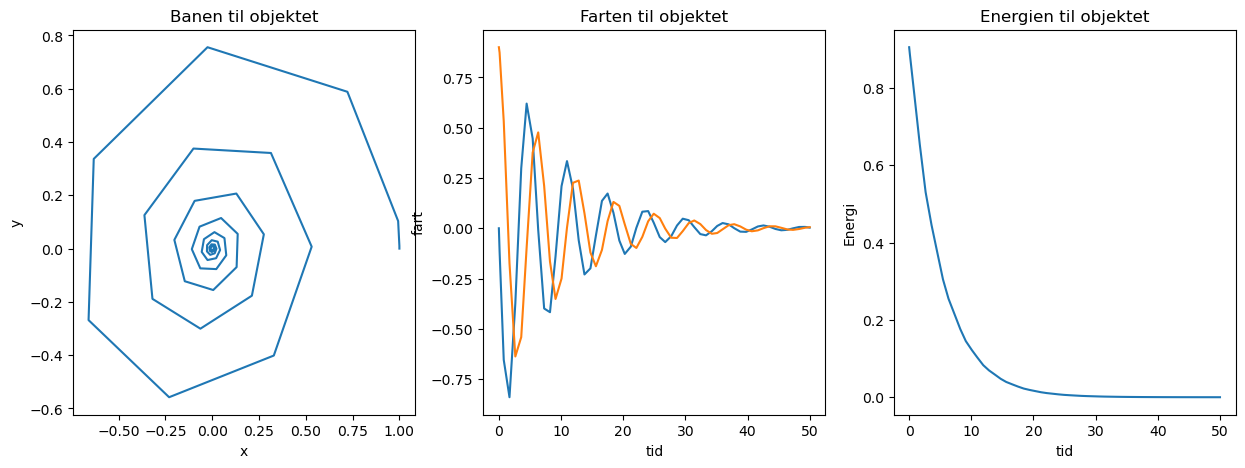

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def dydt(t, y):
    # Regner ut de deriverte til systemet og returnerer de i en array
    #   int t: Simuleringstiden
    # array y: En array med variablene
    #
    # Returnerer en liste med de deriverte til systemet
    xx, xy, vx, vy = y[0], y[1], y[2], y[3]

    dxdt = vx 
    dydt = vy
    duxdt = -xx - c*vx 
    duydt = -xy - c*vy 

    dy = np.array([dxdt, dydt, duxdt, duydt])
    return dy


# Fysiske parametre
c = 0.2

# Start/slutt tid
t0 = 0
tSlutt = 50

# Startverdier
xx0 = 1
xy0 = 0
ux0 = 0
uy0 = 0.9

y0 = np.array([xx0, xy0, ux0, uy0])


# Estimerer løsning, enten med scipy.solve_ivp eller med å kode RK4 selv
sol = scipy.integrate.solve_ivp(dydt, t_span = [t0, tSlutt], y0=y0)
ts = sol.t
xxs = sol.y[0]
xys = sol.y[1]
uxs = sol.y[2]
uys = sol.y[3]

Es = 0.5 * (uxs**2 + uys**2) + 0.5 * (xxs**2 + xys**2)


fig, axs = plt.subplots(1, 3, figsize = (15,5))
ax = axs[0]
ax.plot(xxs, xys)
ax.set_title("Banen til objektet")
ax.set_xlabel("x")
ax.set_ylabel("y")

ax2 = axs[1]
ax2.plot(ts, uxs, label="U [m/s]")
ax2.plot(ts, uys, label="V [m/s]")
ax2.set_title("Farten til objektet")
ax2.set_xlabel("tid")
ax2.set_ylabel("fart")

ax3 = axs[2]
ax3.plot(ts, Es, label="E [J]")
ax3.set_title("Energien til objektet")
ax3.set_xlabel("tid")
ax3.set_ylabel("Energi")

